In [26]:
import sys

In [27]:
path = 'S:\ice\SMRT\smrt'
sys.path.append(path)

In [28]:
import numpy as np
import pandas as pd

import smrt
import matplotlib.pyplot as plt

In [29]:
from smrt import make_snowpack,  make_interface, make_model, make_soil, GHz


In [30]:
# local import
from smrt.core.globalconstants import DENSITY_OF_ICE

### PLAN: 
run sensitivity studies using varying correlation length and different microstructrue models. If that is easy, move into variation in density/ temp? 

### BUILD SNOWPACK:

In [31]:
# prepare the snowpack
density = 300.0
f_vol = .327261
models_list = ['exponential', 'homogeneous', 'sticky_hard_spheres']


In [32]:
## from ssa: 
ssa_l = np.arange(3.5, 45, 1.5)

## solve for r: 
radius_l_int =  [3 / (DENSITY_OF_ICE *ssa) for ssa in ssa_l]

## solve for corr_len
corr_length_int = [3* (1/f_vol)/(DENSITY_OF_ICE*ssa) for ssa in ssa_l]

## convert to arrays: 
radius_l = np.asarray(radius_l_int)
corr_length = np.asarray(corr_length_int)

In [33]:
####n exponential 
sp_exp = [smrt.make_snowpack([1000], 'exponential',density=[density],temperature=[265], corr_length=x) for x in corr_length]

In [34]:
##### homogenous 
sp_h = [smrt.make_snowpack([1000], 'homogeneous',density=[density], temperature=[265], corr_length=x) for x in corr_length]

In [35]:
### sticky hard spheres:
sp_shs = [smrt.make_snowpack([1000], 'sticky_hard_spheres', density=[density], temperature=[265], radius=x) for x in radius_l]

In [36]:
#### independent spheres
sp_is = [smrt.make_snowpack([1000], 'independent_sphere', density=[density], temperature=[265], radius=x) for x in radius_l]

### DEFINE MODEL & SENSOR
for this we will use ____ model and ______ sensor because blah blah blah. 

In [37]:
### set the model/sensor
model = smrt.make_model("iba", "dort")
sensor = smrt.sensor_list.passive(37e9, 55)
#sensor = smrt.sensor_list.passive(2.1e14, 55)

### RESULTS:

In [38]:
## results: 
results_exp = model.run(sensor, sp_exp, snowpack_dimension=('corr_length', corr_length))
results_h = model.run(sensor, sp_h, snowpack_dimension=('corr_length', corr_length))#.to_dataframe()
results_shs = model.run(sensor, sp_shs, snowpack_dimension=('radius', radius_l))#.to_dataframe()
results_is = model.run(sensor, sp_is, snowpack_dimension=('radius', radius_l))

### Plottting: 

### RECREATE FIG: 

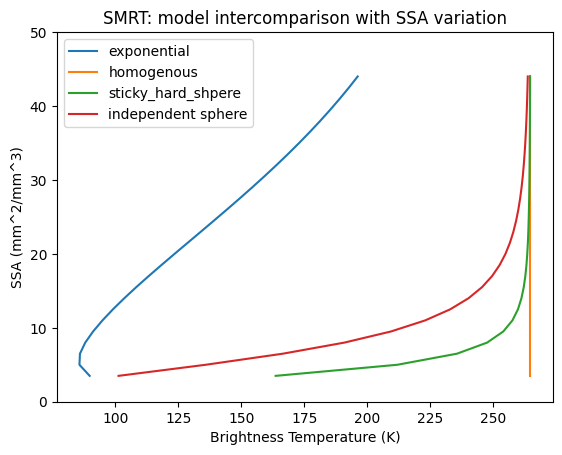

In [22]:
### now with SSA comparison
plt.plot(results_exp.TbV(),ssa_exp,  label='exponential')
plt.plot(results_h.TbV(),ssa_exp,  label='homogenous')
plt.plot(results_shs.TbV(),ssa_shs, label='sticky_hard_shpere')
plt.plot(results_is.TbV(),ssa_shs,  label='independent sphere')
plt.ylim(0, 50)
#plt.yscale('log')
plt.title("SMRT: model intercomparison with SSA variation")
plt.ylabel("SSA (mm^2/mm^3)")
plt.xlabel("Brightness Temperature (K)")
plt.legend(loc='upper left')

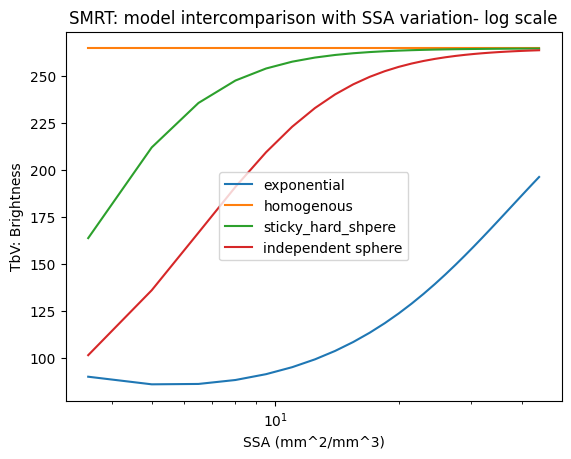

In [24]:
### trying to recreate the plot: 
plt.title("SMRT: model intercomparison with SSA variation- log scale")

plt.plot(ssa_exp, results_exp.TbV(), label='exponential')
plt.plot(ssa_exp, results_h.TbV(), label='homogenous')
plt.plot(ssa_shs, results_shs.TbV(), label='sticky_hard_shpere')
plt.plot(ssa_shs, results_is.TbV(), label='independent sphere')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel("TbV: Brightness")
plt.xlabel("SSA (mm^2/mm^3)")
plt.legend()

Text(0, 0.5, 'Specific Surface Area (SSA)')

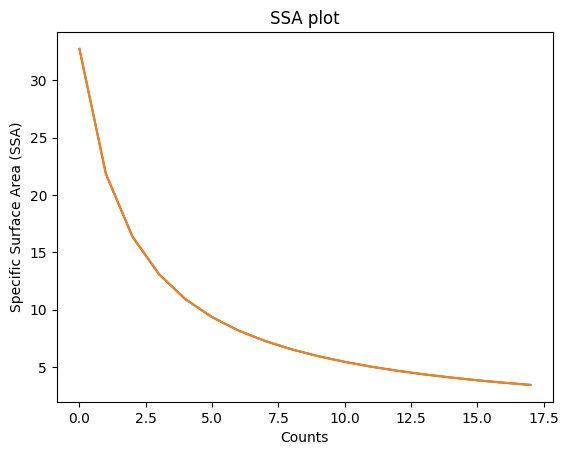

In [401]:
### we see that the x-axis makes more sense logarithmically, beause ssa has been computed as a ratio: 
plt.plot(ssa_exp)
plt.plot(ssa_shs)
plt.title("SSA plot")
plt.xlabel("Counts")
plt.ylabel("Specific Surface Area (SSA)")

### VARYING TEMP: 

In [136]:
## first we need to set correlation length and radius, so that there is an equal SSA: 
radius_t = 0.5* 1e-3 #### 0.5 mmm
corr_len_t = radius_t*(1-f_vol)

## and define our temperature
temp_arr = np.arange(265, 280, 0.5) 

In [137]:
####n exponential 
sp_exp_t = [smrt.make_snowpack([1000], 'exponential',density=[density],temperature=t, corr_length=corr_len_t) for t in temp_arr]
##### homogenous 
sp_h_t = [smrt.make_snowpack([1000], 'homogeneous',density=[density], temperature=t, corr_length=corr_len_t) for t in temp_arr]
### sticky hard spheres:
sp_shs_t = [smrt.make_snowpack([1000], 'sticky_hard_spheres', density=[density], temperature=t, radius=radius_t) for t in temp_arr]
### sticky hard spheres:
sp_is_t = [smrt.make_snowpack([1000], 'independent_sphere', density=[density], temperature=t, radius=radius_t) for t in temp_arr]


### RESULTS

In [138]:
## results: 
results_exp_t = model.run(sensor, sp_exp_t, snowpack_dimension=('temp (K)', temp_arr))
results_h_t = model.run(sensor, sp_h_t, snowpack_dimension=('temp (K)', temp_arr))#.to_dataframe()
results_shs_t = model.run(sensor, sp_shs_t, snowpack_dimension=('temp (K)', temp_arr))#.to_dataframe()
results_is_t = model.run(sensor, sp_is_t, snowpack_dimension=('temp (K)', temp_arr))

### PLOTTING

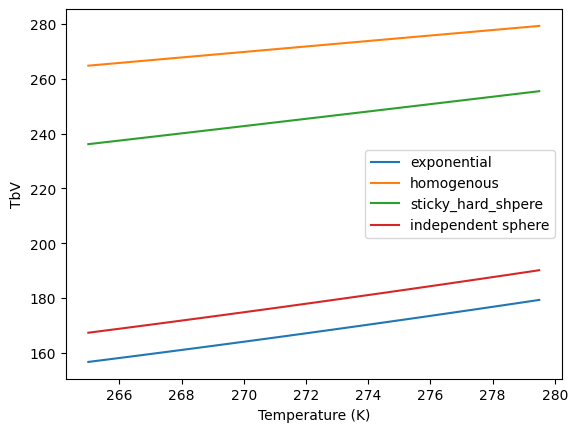

In [139]:
plt.plot(temp_arr, results_exp_t.TbV(), label='exponential')
plt.plot(temp_arr, results_h_t.TbV(), label='homogenous')
plt.plot(temp_arr, results_shs_t.TbV(), label='sticky_hard_shpere')
plt.plot(temp_arr, results_is_t.TbV(), label='independent sphere')
plt.xlabel("Temperature (K)")
plt.ylabel("TbV")
plt.legend()

### SCRATCH + EXAMPLE CODE !! (AH)

In [ ]:
dfs = []
for year in range(1967,2014):
    ....some codes that allow me to generate df1, df2 and df3 
    df1['year'] = year
    df1['origin'] = 'df1'
    df2['year'] = year
    df2['origin'] = 'df2'
    df3['year'] = year
    df3['origin'] = 'df3'
    dfs.extend([df1, df2, df3])
df = pd.concat(dfs)